In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/MATF-istrazivanje-podataka-1/2023_Data_Mining_Chess_Dataset/main/Preprocessing/preprocessed_set(1).csv')

In [ ]:
data.head()
data.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
data.head()

,rated,turns,victory_status,winner,white_rating,black_rating,moves,opening_eco,opening_ply,increment_code
0,1,16,1,0,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,2
1,1,61,2,1,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,2
2,1,95,2,1,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,3
3,1,33,1,1,1520,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,10,2
4,0,9,1,0,1413,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,5,3


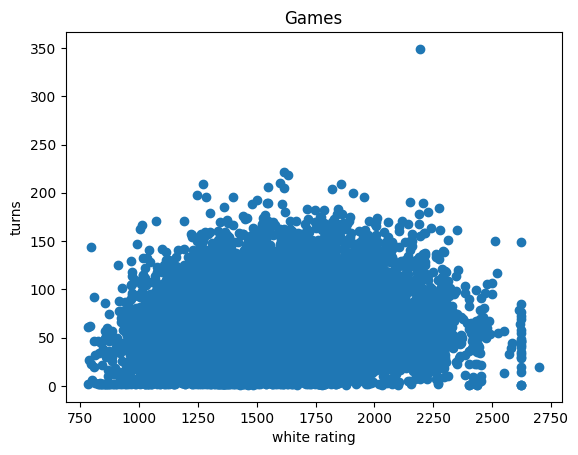

In [ ]:
plt.scatter(data['white_rating'],data['turns'])
plt.xlabel('white rating')
plt.ylabel('turns')
plt.title("Games")
plt.show()

Imamo jedan outlier. To je onaj sa oko 350 poteza. Eliminisacemo ga

In [ ]:
max(data['turns'])

349

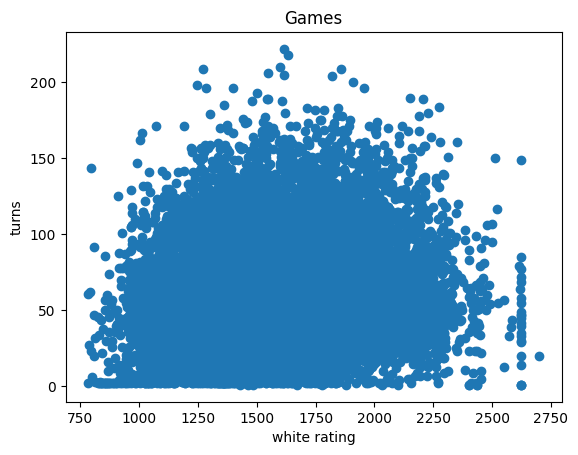

In [ ]:
data = data[data['turns'] !=349]
plt.scatter(data['white_rating'],data['turns'])
plt.xlabel('white rating')
plt.ylabel('turns')
plt.title("Games")
plt.show()

In [ ]:
data.shape

(16864, 10)

In [ ]:
data.drop(columns=['moves'],inplace=True)

In [ ]:
data.drop(columns=['opening_eco'],inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_pca

array([[-1.5686338 ,  0.02138975],
       [-1.15894699, -0.31890491],
       [-0.51726037,  0.94912074],
       ...,
       [-2.13500311,  0.05203388],
       [-1.04270966, -0.64588982],
       [-1.67794911, -1.3188656 ]])

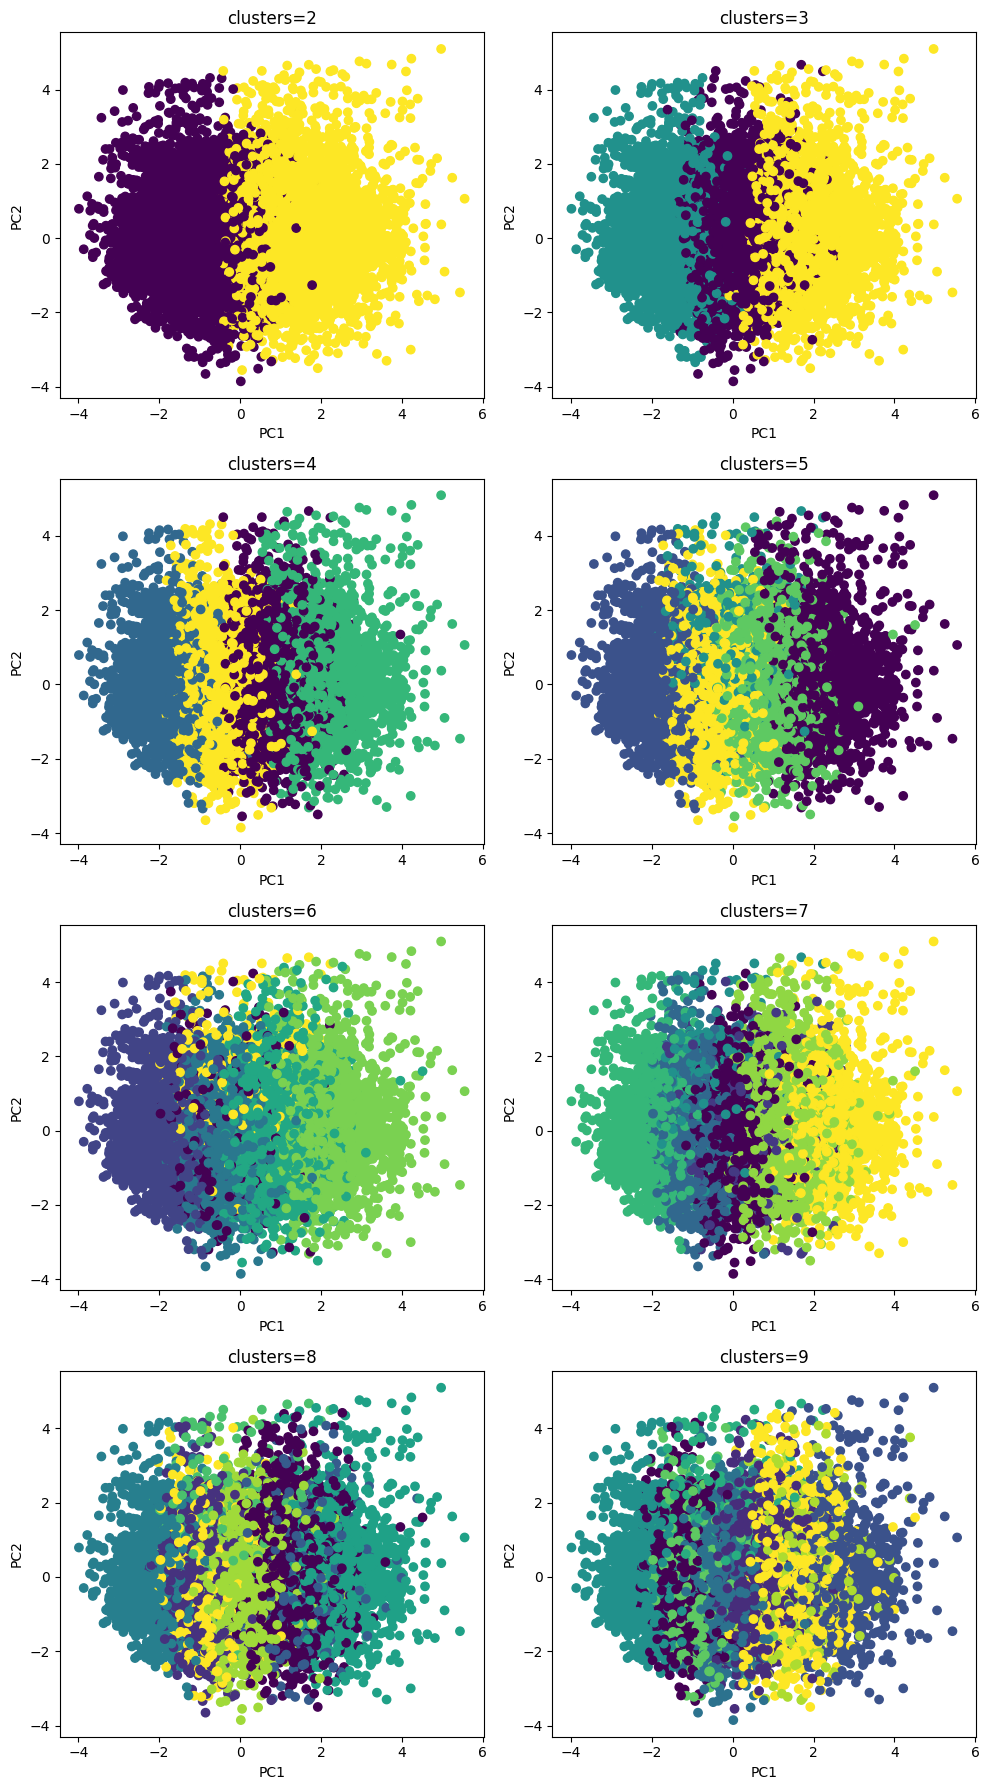

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ks = [i for i in range(2, 10)]
sse = []
silhouettes = []

fig, axes = plt.subplots(4, 2, figsize=(10, 18))
klasteri_ose=zip(ks, axes.flatten())

for k, axis in klasteri_ose:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=55)
    kmeans.fit(data)

    axis.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
    axis.set_title(f"clusters={k}")
    axis.set_xlabel("PC1")
    axis.set_ylabel("PC2")

    sse.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(data, kmeans.labels_))

plt.tight_layout()
plt.show()



Text(0, 0.5, 'SSE')

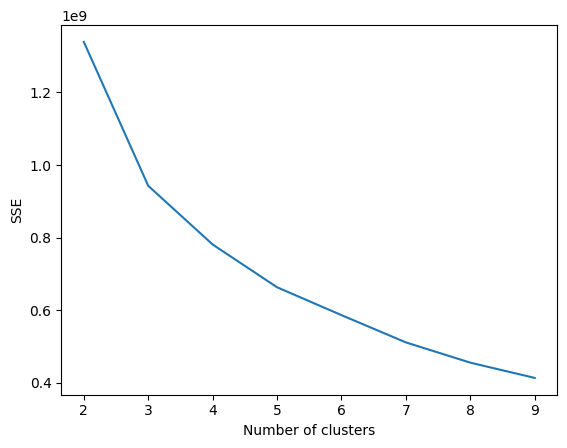

In [ ]:
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

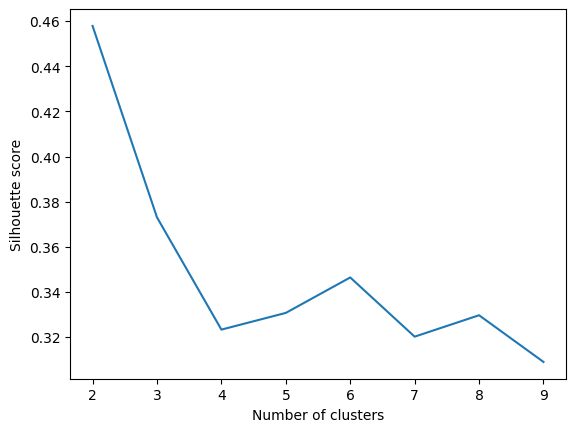

In [ ]:
plt.plot(ks, silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')


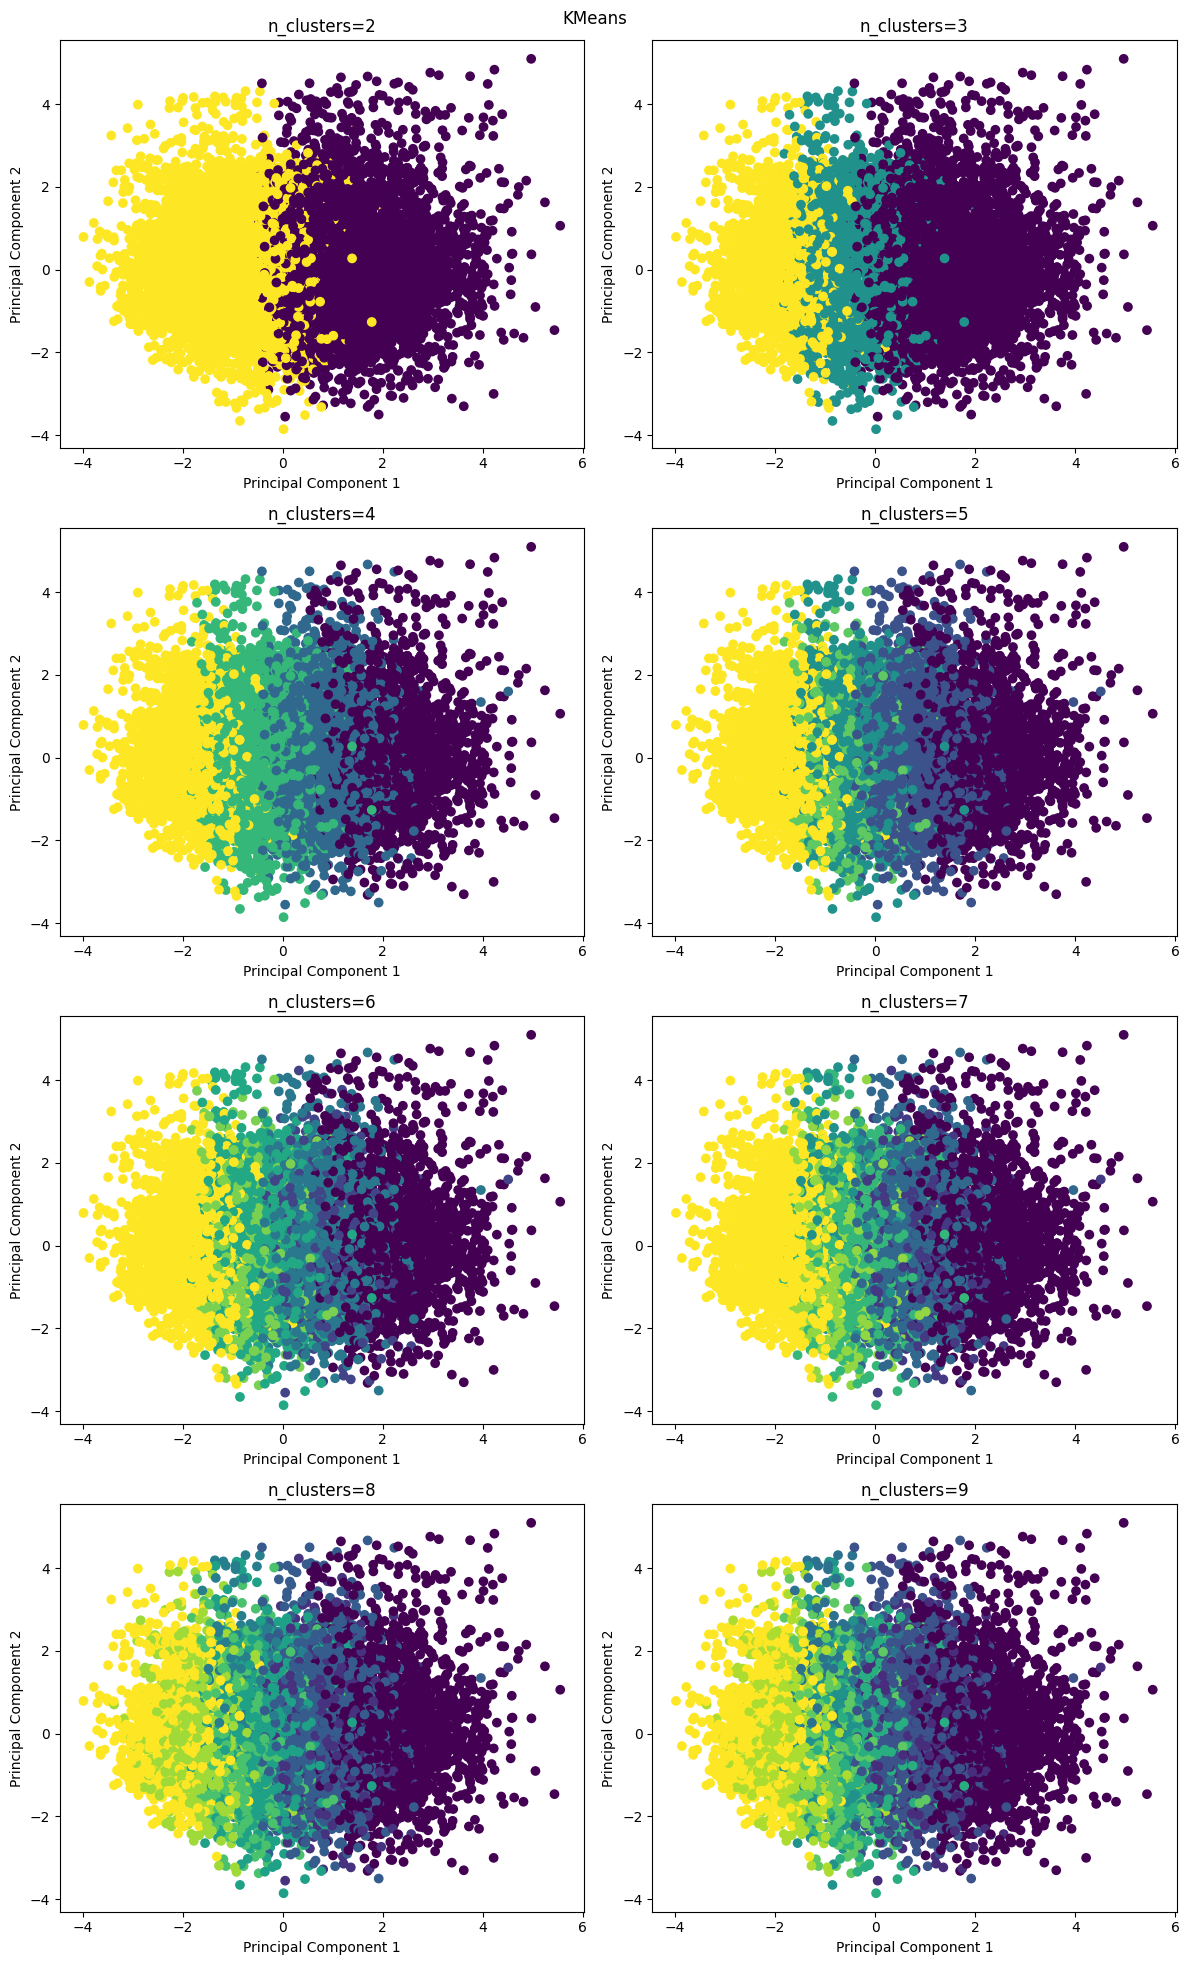

In [ ]:
from sklearn.cluster import BisectingKMeans

sse_bisecting = []
silhouettes_bisecting = []

fig, axs = plt.subplots(4, 2, figsize=(12, 20))
fig.suptitle("KMeans")

for k, ax in zip(ks, axs.flatten()):
    bkmeans = BisectingKMeans(n_clusters=k, bisecting_strategy='largest_cluster', random_state=55)
    bkmeans.fit(data)

    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=bkmeans.labels_)
    ax.set_title(f"n_clusters={k}")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

    sse_bisecting.append(bkmeans.inertia_)
    silhouettes_bisecting.append(silhouette_score(X, bkmeans.labels_))

plt.tight_layout()
plt.show()



Text(0, 0.5, 'SSE')

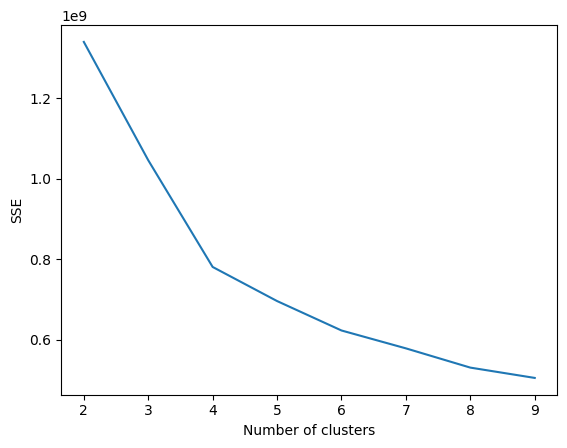

In [ ]:
plt.plot(ks, sse_bisecting)
plt.xticks(ks)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

Text(0, 0.5, 'Silhouette score')

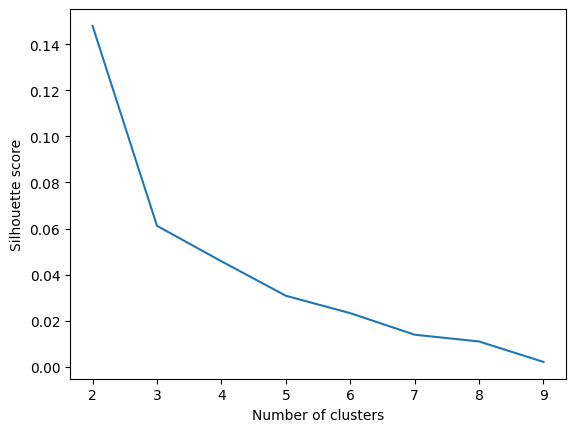

In [ ]:
plt.plot(ks, silhouettes_bisecting)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
